In [9]:
from pinata import Pinata
from metadata import DatasetMetadata
from activeloop import ActiveLoopDS
import pandas as pd
import pickle
import numpy as np

pd.set_option('display.max_colwidth', 1000)

/Users/adamgoldstein/opt/anaconda3/lib/python3.9/site-packages/hub/util/check_latest_version.py:32: UserWarning: A newer version of hub (2.7.5) is available. It's recommended that you update to the latest version using `pip install -U hub`.
  warnings.warn(


In [20]:
import imageio
import os
from tqdm import tqdm

def write_tonumpy(parent_directory,subdirectory,images,labels,chunks=5):
    
    if not os.path.exists(parent_directory):
        os.mkdir(parent_directory)
        
        
    if not os.path.exists(os.path.join(parent_directory,subdirectory)):
        os.mkdir(os.path.join(parent_directory,subdirectory))
        
        
    for label in tqdm(np.unique(labels).tolist()):
        
        label_mask = labels[labels == label]

        image_mask = images[label_mask]

        images_split = np.array_split(image_mask,chunks)
            
        for index,img in enumerate(images_split):

            path = os.path.join(parent_directory, str(label))

            if os.path.exists(path):
                
                complete_path = os.path.join(path,f"sample_{index}.npy")

                np.save(complete_path, img, allow_pickle=False, fix_imports=True)

            else:
                os.mkdir(path)
                
                complete_path = os.path.join(path,f"sample_{index}.npy")
                
                np.save(complete_path, img, allow_pickle=False, fix_imports=True)

        print("Done, images can be found at",parent_directory)


def write_toimage(parent_directory,subdirectory,images,labels):
    
    if not os.path.exists(parent_directory):
        os.mkdir(parent_directory)
        
        
    if not os.path.exists(os.path.join(parent_directory,subdirectory)):
        os.mkdir(os.path.join(parent_directory,subdirectory))
    
    counter = 0

    for img,label in tqdm(zip(images, labels)):

        path = os.path.join(parent_directory, str(label[0]))

        if os.path.exists(path):

            imageio.imwrite(os.path.join(path,f"{str(counter)}.jpg"),img)

        else:
            os.mkdir(path)
            imageio.imwrite(os.path.join(path,f"{str(counter)}.jpg"),img)

        counter += 1
        
    print("Done, images can be found at",parent_directory)
    

In [ ]:
AL = ActiveLoopDS("hub://activeloop",path="mnist")

In [ ]:
AL.load_dataset()

In [14]:
train_images = AL.train.images.numpy()
train_labels = AL.train.labels.numpy()

In [21]:
test_images = AL.test.images.numpy()
test_labels = AL.test.labels.numpy()

In [24]:
write_tonumpy(parent_directory="mnist_np",subdirectory="train",images=train_images,labels=train_labels,chunks=10)
write_tonumpy(parent_directory="mnist_np",subdirectory="test",images=test_images,labels=test_labels,chunks=10)

 70%|██████████████████████████████▊             | 7/10 [00:00<00:00, 33.73it/s]

Done, images can be found at mnist_np
Done, images can be found at mnist_np
Done, images can be found at mnist_np
Done, images can be found at mnist_np
Done, images can be found at mnist_np
Done, images can be found at mnist_np
Done, images can be found at mnist_np


100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 35.53it/s]


Done, images can be found at mnist_np
Done, images can be found at mnist_np
Done, images can be found at mnist_np


100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 95.05it/s]

Done, images can be found at mnist_np
Done, images can be found at mnist_np
Done, images can be found at mnist_np
Done, images can be found at mnist_np
Done, images can be found at mnist_np
Done, images can be found at mnist_np
Done, images can be found at mnist_np
Done, images can be found at mnist_np
Done, images can be found at mnist_np
Done, images can be found at mnist_np


In [25]:
write_toimage(parent_directory="mnist",subdirectory="train",images=train_images,labels=train_labels)
write_toimage(parent_directory="mnist",subdirectory="test",images=test_images,labels=test_labels)

60000it [00:30, 1937.98it/s]


Done, images can be found at mnist


10000it [00:05, 1846.15it/s]

Done, images can be found at mnist


In [127]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint32)

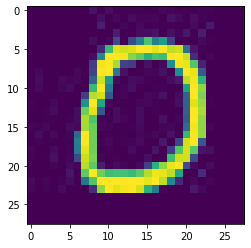

In [18]:
import imageio

import matplotlib.pyplot as plt


img = imageio.imread('mnist/test/0/10.jpg')
plt.imshow(img)
plt.show()

In [19]:
assert 1 == 0

AssertionError: 

# IPFSpy

In [185]:
from ipfspy.ipfsspec import asyn

from ipfspy.ipfshttpapi import IPFSApi

In [186]:
#|ignoretest
import fsspec, os, io, glob, asyncio
from ipfspy.ipfsspec.asyn import AsyncIPFSFileSystem
from fsspec import register_implementation

# register_implementation(IPFSFileSystem.protocol, IPFSFileSystem)
register_implementation(AsyncIPFSFileSystem.protocol, AsyncIPFSFileSystem)

# with fsspec.open("ipfs://QmZ4tDuvesekSs4qM5ZBKpXiZGun7S2CYtEZRB3DYXkjGx", "r") as f:
#     print(f.read())
class fs:
    ipfs = fsspec.filesystem("ipfs")
    file = fsspec.filesystem("file")

In [187]:
fs.ipfs.change_gateway_type = 'local'

Changed to local node


In [205]:
w = fs.ipfs.put(path='mnist', rpath='/mnist', recursive=True, return_cid=True)